In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt

project_root = os.path.abspath('..')
sys.path.insert(0, project_root)

from utils.phase_3 import *

K.set_image_data_format('channels_first')

In [30]:
model = faceRecoModel(input_shape = (3, 96, 96))
model.compile(optimizer = 'adam', loss = triplet_loss_function, metrics = ['accuracy'])

In [31]:
load_weights_from_FaceNet(model)

In [71]:
database = {}
database["tytan"] = img_to_encoding("../database/tytan.jpg", model)
database["julka"] = img_to_encoding("../database/julka.jpeg", model)
database["kuba"] = img_to_encoding("../database/kuba.png", model)
database["wiktor"] = img_to_encoding("../database/wiktor.jpeg", model)

In [72]:
julka = tf.keras.preprocessing.image.load_img("../database/julka.jpeg", target_size=(96, 96))
tytan = tf.keras.preprocessing.image.load_img("../database/tytan.jpg", target_size=(96, 96))
kuba = tf.keras.preprocessing.image.load_img("../database/kuba.png", target_size=(96, 96))
wiktor = tf.keras.preprocessing.image.load_img("../database/wiktor.jpeg", target_size=(96, 96))

In [75]:
julka_test = tf.keras.preprocessing.image.load_img("../assets/julka_test.jpeg", target_size=(96, 96))
tytan_test = tf.keras.preprocessing.image.load_img("../assets/tytan_test.jpg", target_size=(96, 96))
kuba_test = tf.keras.preprocessing.image.load_img("../assets/kuba_test.png", target_size=(96, 96))
wiktor_test = tf.keras.preprocessing.image.load_img("../assets/wiktor_test.jpeg", target_size=(96, 96))

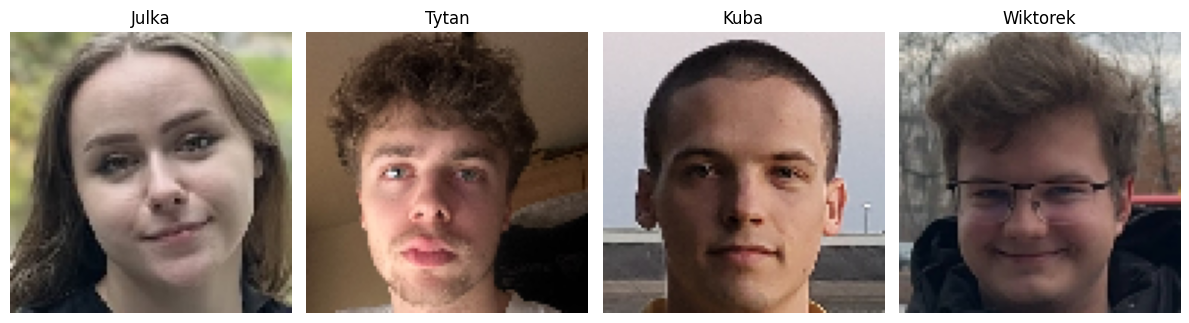

In [73]:
images = [julka, tytan, kuba, wiktor]
titles = ['Julka', 'Tytan', 'Kuba', "Wiktorek"]

plt.figure(figsize=(12, 4))

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

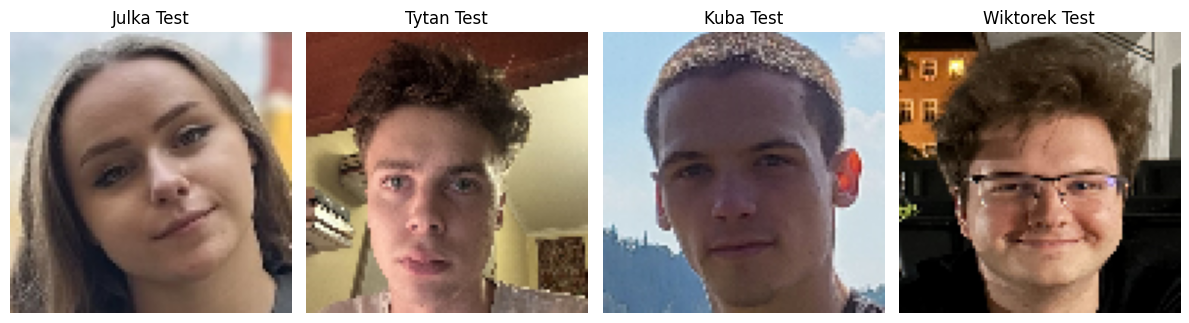

In [76]:
images = [julka_test, tytan_test, kuba_test, wiktor_test]
titles = ['Julka Test', 'Tytan Test', 'Kuba Test', 'Wiktorek Test']

plt.figure(figsize=(12, 4))

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [65]:
def verify(image_path, identity, database, model):
    """
    Function that verifies if the person on the "image_path" image is "identity".

    Arguments:
        image_path -- path to an image
        identity -- string, name of the person you'd like to verify the identity. Has to be an employee who works in the office.
        database -- python dictionary mapping names of allowed people's names (strings) to their encodings (vectors).
        model -- your Inception model instance in Keras

    Returns:
        dist -- distance between the image_path and the image of "identity" in the database.
        valid -- True, if the person is who they claim to be. False otherwise.
    """
    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(database[identity] - encoding)

    if (dist < 1):
        print("It's " + str(identity) + ", welcome in!")
        valid = True
    else:
        print("It's not " + str(identity) + ", please go away")
        valid = False

    return dist, valid

In [79]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.

    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras

    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    encoding =  img_to_encoding(image_path, model)

    min_dist = 100

    for (name, db_enc) in database.items():

        dist = np.linalg.norm(db_enc - encoding)

        if (dist < min_dist):
            min_dist = dist
            identity = name

    if min_dist > 1:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))

    return min_dist, identity

In [80]:
dist, valid = verify("../assets/wiktor_test.jpeg", "wiktor", database, model)
print('the distance is ' + str(dist))

It's wiktor, welcome in!
the distance is 0.56953377


In [81]:
min_dist, identity = who_is_it("../assets/julka_test.jpeg", database, model)
print()
min_dist, identity = who_is_it("../assets/tytan_test.jpg", database, model)
print()
min_dist, identity = who_is_it("../assets/kuba_test.png", database, model)
print()
min_dist, identity = who_is_it("../assets/wiktor_test.jpeg", database, model)

it's julka, the distance is 0.65413105

it's tytan, the distance is 0.5621557

it's kuba, the distance is 0.9043388

it's wiktor, the distance is 0.56953377
